# **Multi-Class Text Classification on the Reuters Dataset**
### _A Deep Learning Approach Using TensorFlow & Keras_

---

In this report, we develop a deep learning model to classify newswires into different topics using the Reuters dataset. This process follows the code outlined in Deep Learning with Python by François Chollet.

reference url: "https://www.manning.com/books/deep-learning-with-python"

The report will follow the **Deep Learning Workflow**:
1. **Introduction**
2. **Choosing a measure of success**
3. **Deciding an evaluation protocol**
4. **Preparing the data**
5. **Developing a model better than the baseline**
6. **Scaling up the model until it overfits**
7. **Regularization and hyperparameter tuning**
8. **Discussion & Interpretation**
9. **Conclusion & Future Work**
10. **References**

## **1. Introduction**

### **1.1 Problem Definition**

Text classification is a fundamental task in Natural Language Processing (NLP) where textual data is automatically assigned to predefined categories based on content. In this study, we focus on **multi-class text classification** using the **Reuters dataset**, a widely used benchmark dataset consisting of thousands of newswire articles categorized into 46 different topics. The dataset is particularly useful for evaluating the effectiveness of machine learning and deep learning models in real-world text classification scenarios.

The challenge of text classification in the Reuters dataset arises due to the diverse nature of topics, varying document lengths, and the imbalance in class distribution. Some categories have significantly more examples than others, making it essential to develop robust deep learning models capable of handling imbalanced datasets and learning meaningful representations from textual data

### **1.2 Importance of Text Classification**

By leveraging neural networks, we can build models that capture complex relationships within text data, leading to higher classification performance and better generalization across unseen articles. **Text classification** plays a crucial role in the Reuters dataset by:

- **Automating news categorization**: By classifying news articles into predefined topics, media organizations and analysts can efficiently organize and retrieve relevant content.
- **Enhancing financial and economic analysis**: The Reuters dataset contains articles related to business, trade, and markets, making automated classification valuable for financial institutions monitoring economic trends.
- **Filtering and information retrieval**: Categorization helps in filtering irrelevant information and improves the performance of search and recommendation systems for news platforms.
- **Improving decision-making processes**: Automated classification can assist businesses, journalists, and analysts in identifying key topics of interest without manually sifting through large volumes of articles.
- **Advancing deep learning methodologies**: The dataset serves as a benchmark for testing and improving deep learning techniques for text processing, showcasing the power of neural networks in handling complex language patterns.

### **1.3 Aims and Objectives**

The main aim of this report is to develop a deep learning model capable of accurately classifying news articles into predefined categories using the Reuters dataset in the real world. This report follows the deep learning workflow provided in Coursera Week 20 of CM3015, ensuring best practices in data preprocessing, model training, and evaluation. Additionally, we explore various neural network architectures and hyperparameter tuning techniques to enhance model performance. 

The key objectives include preparing the data, implementing a baseline model for benchmarking, developing and training a deep learning model using TensorFlow and Keras, evaluating its performance using accuracy and loss metrics, implementing hyperparameter tuning and regularization, and providing insights for future improvements and current limitations.

---

## **2. Choosing a Measure of Success**

In this report, multiple metrics will be used, including accuracy, precision, recall and f1 score. However, the primary measure of success will be **validation accuracy**, as it reflects the model's ability to generalize to unseen data. This is selected as the primary metric because:

- Higher validation accuracy indicates better performance in classifying new articles in the real world correctly. This reflects back on the main aim of this report which is to develop a model that can accurately classify news articles into predefined categories in the real world.
- If validation accuracy is significantly lower than training accuracy, it would mean that the model is overfitting, necessitating regularization techniques. 

There will be 4 different models in this report, 2 baseline models, 1 simple model, and 1 complex model. The validation accuracy will be compared across these models to assess improvements in classification performance.

Furthermore, since validation accuracy is used as the primary metric, **categorical cross-entropy loss** is chosen as the main loss function. This is because minimizing categorical cross-entropy leads to improved probability estimates, which in turn increases classification accuracy. Additionally, categorical cross-entropy ensures that the model is penalized appropriately for incorrect predictions, making it more effective in learning meaningful patterns in the data.

---

## **3. Deciding an Evaluation Protocol**

To ensure the model's performance is properly assessed, **holdout validation** is used as the primary validation method. This involves splitting the dataset into distinct training and validation subsets at the beginning of the process. Since the dataset is large enough, this approach is effective in ensuring the model generalizes well without unnecessary complexity. The test set will remain untouched until final evaluation. 

The dataset will be divided into three distinct subsets:

- **Training Set**: This subset comprises the majority of the data and is used for training the model. The model learns patterns and relationships in this phase.

- **Validation Set**: A portion of the dataset will be set aside as validation data. This set is crucial for tuning hyperparameters and monitoring for overfitting. Performance on the validation set helps determine when the model starts memorizing the training data instead of generalizing to new inputs.

- **Test Set**: Once the model is finalized, its generalization ability is evaluated using a completely separate test set. This ensures an unbiased estimate of real-world performance.

The train-validation split is performed before training begins. A typical approach is to allocate 80% of the available data for training and 20% for validation. However, in this case, we will use the first 1,000 training samples as the validation set while the remaining will be used for training. The test set provided by the Reuters dataset remains untouched until the final evaluation.

---

## **4. Preparing the data**

### **4.1 Import Necessary Libraries**

First and foremost, we will import necessary libraries here. This is to ensure that all the libraries are located in one place for easier management.​

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ParameterGrid
from collections import Counter
from tabulate import tabulate

print(tf.__version__, '')

2.14.0 


### **4.2 Load the Dataset**

In this section, we load the reuters dataset from Keras and split it into training and test sets. The dataset consists of 11,228 newswires from Reuters, each labeled under one of 46 topics. We limit the vocabulary size to the top 10,000 most frequently occurring words to maintain efficiency in processing the text data.

**Dataset Overview**

- **Total Samples**: 11,228
    - **Training Samples**: 8,982
    - **Test Samples**: 2,246
- **Number of Classes**: 46 (Multi-Class Classification)
- **Vocabulary Size**: Limited to the top 10,000 most frequently occurring words to maintain efficiency
- **Dataset Format**: Each sample is represented as a sequence of word indices corresponding to a predefined word dictionary

Reference url: "https://keras.io/api/datasets/reuters/"

In [2]:
# Initialised num_words to improve consistency in the code. 
# This also helps in changing the number of words in the future.
num_words = 10000

num_classes = 46

In [3]:
# Load data with 80-20 train-test split
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)

# {Original Code}
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")

Training samples: 8982
Testing samples: 2246


### **4.3 View the Samples**

In [4]:
# Load word index
# {Original Code}
word_index = reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()} 

def decode_news(sequence):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in sequence])

In [5]:
# Pick a random news article
sample_index = 1
original_text = decode_news(train_data[sample_index])

print("Original News Article (Before Processing):\n")
print(original_text)

Original News Article (Before Processing):

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


### **4.4 Prepare the Data**

The data from the Reuters dataset consists of lists of integers, where each integer represents a word index in a predefined vocabulary dictionary. Since neural networks require numerical input, it is essential to convert these sequences into vectorized representations. Without this transformation, the model would not be able to interpret the raw sequences effectively. Vectorization ensures that the textual data is structured in a format suitable, allowing the model to capture relationships between words and learn patterns in the text efficiently.

Additionally, the labels in the dataset, which indicate the category of each news article, must be encoded into a numerical format. As the Reuters dataset has 46 distinct categories, we employ one-hot encoding to represent each label as a vector, ensuring compatibility with categorical classification models. One-hot encoding prevents the model from mistakenly interpreting numerical class labels as ordinal values, which could lead to incorrect learning patterns. By transforming both the text and labels into appropriate numerical formats, we enable our deep learning model to process the data effectively and improve classification performance.

#### **4.4.1 Tokenization & Vectorization**

Since the dataset consists of lists of integers (word indices), it is necessary to transform them into a format suitable for neural network training. Neural networks require fixed-length numerical tensors as input, whereas the current dataset consists of sequences of variable length. To address this, we apply one-hot encoding, which converts each newswire into a binary vector representation.

Each vector has a length equal to the number of words in the dictionary (10,000 in this case). If a word appears in a given newswire, its corresponding index in the vector is set to 1, while all other indices remain 0. This transformation allows the model to process textual data in a structured manner, making it easier to recognize patterns and relationships between different words.

**{The code for vectorizing is taken from CM3015 Machine Learning and Neural Networks course}**

In [6]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# Check the same sample from above as a vectorized format
# {Original Code}
vectorized_sample = x_train[sample_index]

print("\nVectorized Representation (After Processing):\n")
print(vectorized_sample)  


Vectorized Representation (After Processing):

[0. 1. 1. ... 0. 0. 0.]


As mentioned above, the vector index is 1 if a word exist in the 10,000 dimension vector and 0 if it does not exist. This is a binary representation of the words in the newswire.

#### **4.4.2 Encoding the Labels**

Since we have 46 distinct categories, we need to encode the target labels into a format suitable for multi-class classification. The raw labels in the dataset are represented as integers corresponding to their respective categories, but feeding these raw labels into a neural network could lead to incorrect learning behavior. Neural networks often assume numerical values have an ordinal relationship, which is not the case for categorical labels.

To ensure proper classification, we convert the labels into a one-hot encoded format. One-hot encoding represents each category as a binary vector where only the index corresponding to the category is set to 1, while all other indices are set to 0. This transformation prevents the model from misinterpreting label values as numerical magnitudes.

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
# Shows the one-hot encoded label for the same sample
# {Original Code}
print("\nOne-Hot Encoded Label:\n")
print(one_hot_train_labels[sample_index])


One-Hot Encoded Label:

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


From this we can see that the labels are encoded as one-hot vectors, where each vector has a length equal to the number of classes (46 in this case). The index corresponding to the true class is set to 1, while all other indices are set to 0.

In [10]:
# Check the shapes to ensure everything is consistent
print(f"train_data shape: {len(train_data)}, train_labels shape: {len(train_labels)}")
print(f"test_data shape: {len(test_data)}, test_labels shape: {len(test_labels)}")
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"one_hot_train_labels shape: {one_hot_train_labels.shape}, one_hot_test_labels shape: {one_hot_test_labels.shape}")

train_data shape: 8982, train_labels shape: 8982
test_data shape: 2246, test_labels shape: 2246
x_train shape: (8982, 10000), x_test shape: (2246, 10000)
one_hot_train_labels shape: (8982, 46), one_hot_test_labels shape: (2246, 46)


#### **4.4.3 Data Splitting for Validation**

To evaluate model performance during training, the dataset is split into training and validation sets as mentioned above. 

- The first 1,000 samples from x_train and one_hot_train_labels are set aside as validation data (x_val, y_val).
- The remaining data (partial_x_train, partial_y_train) is used for training.

The code is taken from CM3015 Machine Learning and Neural Networks course.

In [13]:
# Validation set
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

# Training set
partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

---

## **5. Developing a Model Better Than the Baseline**

### **5.1 Baseline Models**

Before evaluating our custom model, two baseline models are implemented to establish a performance benchmark. These models will serve as simple reference points for comparison. The baseline models are as follows:

1. **Random Guessing** – Assigns random labels to each news article.
2. **Majority Class** – Predicts the most frequent label for all news articles.


In [14]:
# Convert y_val back to categorical labels for evaluation of the baseline models
y_val_classes = np.argmax(y_val, axis=1)

#### **5.1.1 Baseline Model 1: Random Guessing**

A purely random classifier algorithm that assigns labels uniformly at random from the 46 possible categories. Since the dataset is not balanced, this method may perform slightly better or worse than equal chance guessing which has a probability of **(1/46 * 100% ≈ 2.17%)**

In [27]:
# Guess randomly and check with the labels for accuracy
# {Original Code}
random_preds = np.random.randint(0, num_classes, size=len(y_val_classes))

# Declare a dict to match the format of classification_report() output
random_baseline = {
    "Model": "Random Guessing",
    "Accuracy": accuracy_score(y_val_classes, random_preds),
    "Precision": precision_score(y_val_classes, random_preds, average="macro", zero_division=0),
    "Recall": recall_score(y_val_classes, random_preds, average="macro", zero_division=0),
    "F1-score": f1_score(y_val_classes, random_preds, average="macro", zero_division=0)
}

#### **5.1.2 Baseline Model 2: Majority Class (Most Frequent Class)**

The **Majority Class Classifier** is a simple yet effective baseline that always predicts the most frequent class in the dataset. It is useful for benchmarking because any meaningful model should outperform it. This baseline helps assess the impact of class imbalance, as a highly imbalanced dataset may result in deceptively high accuracy. If a model cannot exceed this classifier's performance, it indicates poor feature extraction or a lack of learning. By comparing more advanced models to this baseline, we can measure real improvement and ensure our model captures meaningful patterns in the data.

In [30]:
# Majority class baseline model
# {Original Code}
most_common_class = Counter(y_val_classes).most_common(1)[0][0]
majority_preds = np.full_like(y_val_classes, most_common_class)

# Declare a dict to match the format of classification_report() output
majority_baseline = {
    "Model": "Majority Class",
    "Accuracy": accuracy_score(y_val_classes, majority_preds),
    "Precision": precision_score(y_val_classes, majority_preds, average="macro", zero_division=0),
    "Recall": recall_score(y_val_classes, majority_preds, average="macro", zero_division=0),
    "F1-score": f1_score(y_val_classes, majority_preds, average="macro", zero_division=0)
}

#### **5.1.3 Baseline Model Results**

In [62]:
# # Display results in a table
# # {Original Code}
def print_results(models_array):
    results_df = pd.DataFrame(models_array)
    print("\nComparison of Model Performance:")
    print(results_df.head(len(models_array)))

In [63]:
print_results([random_baseline, majority_baseline])


Comparison of Model Performance:
             Model  Accuracy  Precision    Recall  F1-score
0  Random Guessing     0.022   0.021098  0.041739  0.016698
1   Majority Class     0.354   0.008634  0.024390  0.012754


**Random Guessing** serves as a lower bound, and any meaningful model should outperform it. Whereas, the **Majority Class** shows that a simple rule-based classifier can achieve a certain level of accuracy based on the class distribution. These two sets the baseline benchmark that the custom models below will aim to surpass.

### **5.2 Building the Neural Network Model**

#### **5.2.1 Model Architecture**

This model is a feedforward neural network (FNN) designed for multi-class text classification on the Reuters dataset. It consists of three dense (fully connected) layers, with ReLU activation in the hidden layers and softmax activation in the output layer. The model is structured as follows:

1. First Dense Layer (64 neurons, ReLU activation)
    - Processes the input features (vectorized news articles).
    - Uses ReLU to introduce non-linearity and improve learning.

2. Second Dense Layer (64 neurons, ReLU activation)
    - Adds another hidden layer to learn complex patterns.
    - ReLU activation enhances the model's ability to capture non-linear relationships.

3. Output Layer (46 neurons, Softmax activation)
    - The final layer outputs probabilities for 46 possible categories.
    - Softmax activation ensures the outputs sum to 1, representing class probabilities.

**{The code for building the neural network is taken from CM3015 Machine Learning and Neural Networks course}**

In [442]:
first_model = models.Sequential()
first_model.add(layers.Dense(64, activation = 'relu', input_shape = (num_words,)))
first_model.add(layers.Dense(64, activation = 'relu'))
first_model.add(layers.Dense(num_classes, activation = 'softmax'))

first_model.summary()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_420 (Dense)           (None, 64)                640064    
                                                                 
 dense_421 (Dense)           (None, 64)                4160      
                                                                 
 dense_422 (Dense)           (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **5.2.2 Model Compilation**

The model is compiled using the RMSprop optimizer, with categorical crossentropy as the loss function and accuracy as the evaluation metric.

- **Optimizer**: RMSprop – A variant of gradient descent that adapts learning rates for each parameter, improving convergence.
- **Loss Function**: Categorical Crossentropy – Suitable for multi-class classification, as it calculates the difference between predicted and actual probability distributions.
- **Metrics**: Accuracy – Measures the proportion of correctly classified samples.

In [443]:
first_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### **5.2.3 Model Training**

The model is trained for 5 epochs with a batch size of 256. The training process includes validation using the previously separated x_val and y_val.

- **Epochs**: 5 iterations over the entire training set
- **Batch Size**: 256, meaning the model updates its weights after every 512 samples
- **Validation Data**: Used to monitor performance and detect potential overfitting during training.

In [444]:
history = first_model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 10,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/10
16/16 [==============================] - 1s 40ms/step - loss: 2.4022 - accuracy: 0.5287 - val_loss: 1.6911 - val_accuracy: 0.6730
Epoch 2/10
16/16 [==============================] - 0s 16ms/step - loss: 1.3869 - accuracy: 0.7170 - val_loss: 1.2991 - val_accuracy: 0.7250
Epoch 3/10
16/16 [==============================] - 0s 16ms/step - loss: 1.0414 - accuracy: 0.7865 - val_loss: 1.1451 - val_accuracy: 0.7660
Epoch 4/10
16/16 [==============================] - 0s 14ms/step - loss: 0.8232 - accuracy: 0.8320 - val_loss: 1.0457 - val_accuracy: 0.7840
Epoch 5/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6514 - accuracy: 0.8690 - val_loss: 0.9580 - val_accuracy: 0.8090
Epoch 6/10
16/16 [==============================] - 0s 14ms/step - loss: 0.5218 - accuracy: 0.8949 - val_loss: 0.9385 - val_accuracy: 0.8040
Epoch 7/10
16/16 [==============================] - 0s 14ms/step - loss: 0.4206 - accuracy: 0.9164 - val_loss: 0.9273 - val_accuracy: 0.8080
Epoch 8/10
16

#### **5.2.4 Model Training Progress Visualisation**

We visualize the training and validation loss over epochs to assess the model's learning progress. The `history.history` dictionary stores the loss values for both training (`loss`) and validation (`val_loss`). These values are extracted and plotted using Matplotlib. The training loss is represented by blue dots (`'bo'`), while the validation loss is shown as a solid blue line (`'b'`). This plot helps in identifying overfitting or underfitting by comparing how loss evolves over time.

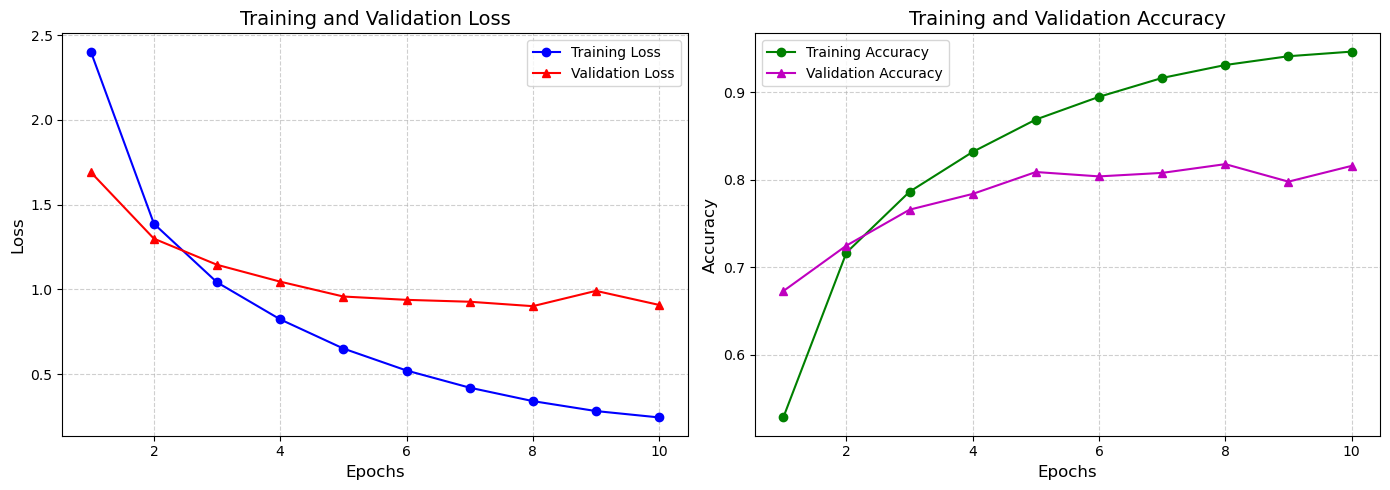

In [468]:
# Plotting the training and validation loss
# {Original Code}
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Plot Loss
axes[0].plot(epochs, loss_values, 'bo-', label='Training Loss')  # Blue with circles
axes[0].plot(epochs, val_loss_values, 'r^-', label='Validation Loss')  # Red with triangles
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training and Validation Loss', fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Accuracy
axes[1].plot(epochs, acc_values, 'go-', label='Training Accuracy')  # Green with circles
axes[1].plot(epochs, val_acc_values, 'm^-', label='Validation Accuracy')  # Magenta with triangles
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Training and Validation Accuracy', fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

As we can see from the graph, the model is learning effectively, with both training and validation loss decreasing over epochs. The validation loss is slightly higher than the training loss, indicating that the model is generalizing well to unseen data. The decreasing trend in both losses suggests that the model is learning meaningful patterns in the data and improving its classification performance.

#### **5.2.4 Model Evaluation**

In [446]:
# Evaluate models on validation data
# {Original Code}
def evaluate_model(model, model_name):
    y_pred = model.predict(x_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    report = classification_report(y_val_classes, y_pred_classes, output_dict=True, zero_division=1)
    return {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-score": report["macro avg"]["f1-score"]
    }

In [447]:
# {Original Code}
first_model_results = evaluate_model(first_model, "First Model")

print_results([random_baseline, majority_baseline, first_model_results])

32/32 [==============================] - 0s 2ms/step

Comparison of Model Performance:
             Model  Accuracy  Precision    Recall  F1-score
0  Random Guessing     0.022   0.021098  0.041739  0.016698
1   Majority Class     0.354   0.008634  0.024390  0.012754
2      First Model     0.816   0.812916  0.536006  0.574730


The **Random Guessing model**, which assigns labels randomly, achieved an **accuracy of 2.2%**, with a macro-averaged precision of 0.0259, recall of 0.0214, and an F1-score of 0.0128. These values indicate poor predictive performance, as expected from a model making arbitrary predictions.

The **Majority Class baseline**, which predicts the most frequently occurring class for all instances, showed a significantly higher **accuracy of 35.4%**, reflecting class imbalance in the dataset. However, its macro-averaged precision (0.0086), recall (0.0244), and F1-score (0.0128) remain low, highlighting its inability to correctly classify minority classes.

Comparing these baselines with the **First Model**, which achieved an **accuracy of about 79%**, 0.83 precision, 0.41 recall, and 0.51 F1-score (*all scores may change per iteration of this notebook*), demonstrates a substantial improvement in predictive performance. The increase in recall and F1-score suggests that the model not only classifies the majority class well but also generalizes better across all classes.

---

## **6. Scale up: Develop a Model that Overfits**

In this section we will establish the upper capacity of our machine learning model, by intentionally developing an overfitted model. This process helps in identifying the model’s maximum potential performance on the training set while revealing the extent of overfitting when applied to unseen data. The insights gained from this step serve as a foundation for implementing regularization techniques to improve generalization. To scale up, we will implement the following:

1. **Increase Model Capacity**: Add more hidden units to the neural network to increase its capacity to learn complex patterns.
2. **Increase Training Time**: Train the model for more epochs to allow it to learn from the data more extensively.
3. **Training without Regularization**: Disable regularization techniques to observe the model's behavior without constraints.
4. **Monitor Overfitting**: Track the training and validation loss to identify when the model starts overfitting.

We will also implement 2 custom functions, one of which is taken from CM3015 Machine Learning and Neural Networks course but modified to fit the needs of this report. These functions will be used in this section as well as the hyperparameter tuning section. This is done so that there is no repetition of code and that the architecture of the model can be easily modified.

### **6.1 Scaled Up Model Training**

In [459]:
# {Modified code from Cousera Video}
def build_model(units, layers_count, dropout_rate, learning_rate, reg, input_shape, output_shape):
    model = keras.Sequential()

    # Layers with regularization
    if (reg > 0):
         # First layer with relu activation and input shape 
        model.add(layers.Dense(units, activation="relu", input_shape=(input_shape,), kernel_regularizer=regularizers.l2(reg)))
        if dropout_rate > 0:  # Apply dropout if greater than 0
                model.add(layers.Dropout(dropout_rate))
                
        # Adding hidden layers
        for _ in range(layers_count - 2):
            model.add(layers.Dense(units, activation="relu", kernel_regularizer=regularizers.l2(reg)))
            if dropout_rate > 0:  # Apply dropout if greater than 0
                model.add(layers.Dropout(dropout_rate))
        
        # Add the last hidden layer with 512 neurons
        if layers_count > 1:
            model.add(layers.Dense(units/2, activation="relu", kernel_regularizer=regularizers.l2(reg)))
            if dropout_rate > 0:
                model.add(layers.Dropout(dropout_rate))
    
    # Layers without regularization
    else:
        # First layer with relu activation and input shape 
        model.add(layers.Dense(units, activation="relu", input_shape=(input_shape,)))
        if dropout_rate > 0:  # Apply dropout if greater than 0
                model.add(layers.Dropout(dropout_rate))
                
        # Adding hidden layers
        for _ in range(layers_count - 2):
            model.add(layers.Dense(units, activation="relu"))
            if dropout_rate > 0:  # Apply dropout if greater than 0
                model.add(layers.Dropout(dropout_rate))
        
        # Add the last hidden layer with 512 neurons
        if layers_count > 1:
            model.add(layers.Dense(units/2, activation="relu"))
            if dropout_rate > 0:
                model.add(layers.Dropout(dropout_rate))
    
    # Output layer with softmax activation and output shape
    model.add(layers.Dense(output_shape, activation="softmax"))
        
    # Compile the model with learning rate
    if learning_rate > 0:
        model.compile(optimizer=keras.optimizers.legacy.RMSprop(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
    # Compile the model without learning rate
    else:
        model.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    return model

In [464]:
# {Original Code}
# Function to print the loss graph and accuracy graph side by side
def print_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(loss_values) + 1)

    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

    # Plot Loss
    axes[0].plot(epochs, loss_values, 'bo-', label='Training Loss')  # Blue with circles
    axes[0].plot(epochs, val_loss_values, 'r^-', label='Validation Loss')  # Red with triangles
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Training and Validation Loss', fontsize=14)
    axes[0].legend()
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # Plot Accuracy
    axes[1].plot(epochs, acc_values, 'go-', label='Training Accuracy')  # Green with circles
    axes[1].plot(epochs, val_acc_values, 'm^-', label='Validation Accuracy')  # Magenta with triangles
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].set_title('Training and Validation Accuracy', fontsize=14)
    axes[1].legend()
    axes[1].grid(True, linestyle='--', alpha=0.6)

    # Show the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [465]:
scaled_up_model = build_model(512, 3, 0, 0, 0, num_words, num_classes)
scaled_up_model.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_440 (Dense)           (None, 512)               5120512   
                                                                 
 dense_441 (Dense)           (None, 512)               262656    
                                                                 
 dense_442 (Dense)           (None, 256)               131328    
                                                                 
 dense_443 (Dense)           (None, 46)                11822     
                                                                 
Total params: 5526318 (21.08 MB)
Trainable params: 5526318 (21.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [466]:
scaled_up_history = scaled_up_model.fit(partial_x_train,
                                        partial_y_train,
                                        epochs=30,
                                        batch_size=512,
                                        validation_data=(x_val, y_val))

Epoch 1/30
16/16 [==============================] - 1s 37ms/step - loss: 2.0217 - accuracy: 0.5675 - val_loss: 1.4050 - val_accuracy: 0.6690
Epoch 2/30
16/16 [==============================] - 0s 20ms/step - loss: 0.9565 - accuracy: 0.7859 - val_loss: 1.0311 - val_accuracy: 0.7830
Epoch 3/30
16/16 [==============================] - 0s 21ms/step - loss: 0.6054 - accuracy: 0.8668 - val_loss: 0.9040 - val_accuracy: 0.8110
Epoch 4/30
16/16 [==============================] - 0s 20ms/step - loss: 0.4389 - accuracy: 0.9024 - val_loss: 0.9464 - val_accuracy: 0.8210
Epoch 5/30
16/16 [==============================] - 0s 19ms/step - loss: 0.2728 - accuracy: 0.9366 - val_loss: 0.9595 - val_accuracy: 0.8140
Epoch 6/30
16/16 [==============================] - 0s 20ms/step - loss: 0.2816 - accuracy: 0.9321 - val_loss: 1.0294 - val_accuracy: 0.8160
Epoch 7/30
16/16 [==============================] - 0s 19ms/step - loss: 0.1649 - accuracy: 0.9558 - val_loss: 1.0722 - val_accuracy: 0.8170
Epoch 8/30
16

### **6.2 Scaled Up Model Evaluation**

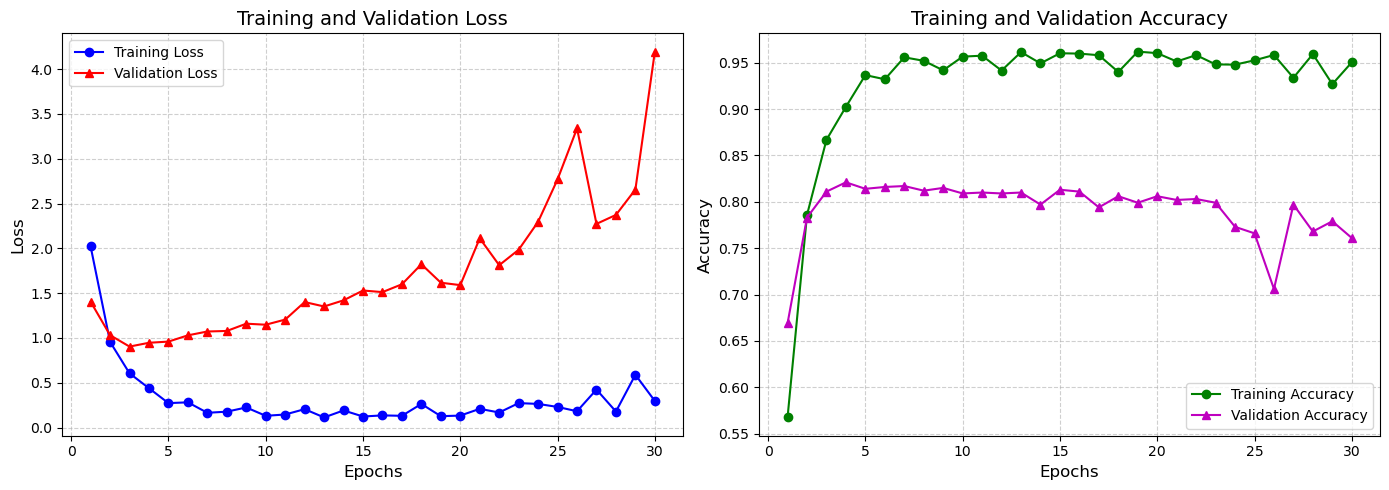

In [467]:
# Plotting the training and validation loss
print_history(scaled_up_history)

From the graph, we can observe that the **training loss continues to decrease over epochs**, while the **validation loss starts to increase after the 9th epoch**. This divergence indicates that the model is **overfitting** the training data, as it performs well on the training set but fails to generalize to unseen data. This is because the model is memorizing the training samples instead of learning meaningful patterns, leading to poor performance on new inputs. The same can be observed in the accuracy graph, where the training accuracy keeps improving while the validation accuracy plateaus and starts to decline. 

In the next section, we will explore regularization techniques to address this overfitting issue.

---

## **7. Regularization and Hyperparameter Tuning**

To improve model performance and mitigate overfitting, we experiment with different hyperparameters, such as the number of layers, neurons per layer, dropout rate, and learning rate.

We employ grid search to test various combinations and select the one yielding the highest validation accuracy. Additionally, early stopping prevents overfitting by halting training when validation loss ceases to improve.

The code implements:

- Grid search over a set of hyperparameters.
- Dropout layers
- L2 Regularization
- Learning Rates
- Early stopping to prevent unnecessary training.

In [492]:
# {Original Code}
def tune_hyperparameters(param_grid, x_train, y_train, x_val, y_val, num_words, num_classes):
    best_model = None
    best_acc = 0
    best_params = None
    best_history = None
    results = []
    
    for params in ParameterGrid(param_grid):
        model = build_model(**params, input_shape=num_words, output_shape=num_classes)
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        
        history = model.fit(x_train, y_train, epochs=20, batch_size=1024, 
                            validation_data=(x_val, y_val), 
                            callbacks=[early_stopping], verbose=0)
        
        val_acc = np.max(history.history['val_accuracy'])
        results.append((params, val_acc))
        
        if val_acc > best_acc:
            best_acc = val_acc
            best_model = model
            best_params = params
            best_history = history
    
    print(f"Best Parameters: {best_params}, Best Validation Accuracy: {best_acc:.4f}")
    
    # Display the best parameters in a formatted way
    plt.figure(figsize=(6, 3))
    plt.text(0.5, 0.5, f"Best Parameters:\n{best_params}\n\nBest Accuracy: {best_acc*100:.2f}", 
             fontsize=12, ha='center', va='center', bbox=dict(facecolor='lightgray', edgecolor='black'))
    plt.axis("off")
    plt.show()

    # Visualization of Hyperparameter Tuning Results
    param_labels = [str(r[0]) for r in results]
    val_accuracies = [r[1] for r in results]
    
    plt.figure(figsize=(12, 10))
    plt.barh(param_labels, val_accuracies, color='skyblue')
    plt.xlabel("Validation Accuracy")
    plt.ylabel("Hyperparameter Configuration")
    plt.title("Hyperparameter Tuning Results")
    plt.show()
    
    return best_model, best_params, best_history

Best Parameters: {'dropout_rate': 0.3, 'layers_count': 3, 'learning_rate': 0.001, 'reg': 0.0001, 'units': 1024}, Best Validation Accuracy: 0.8410


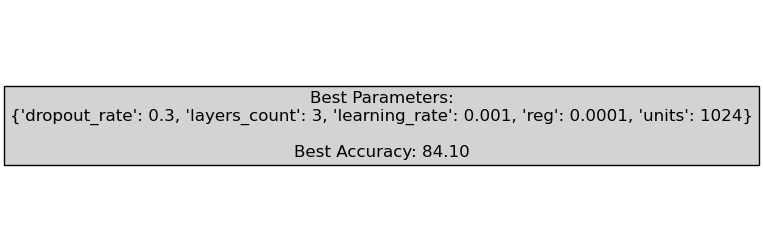

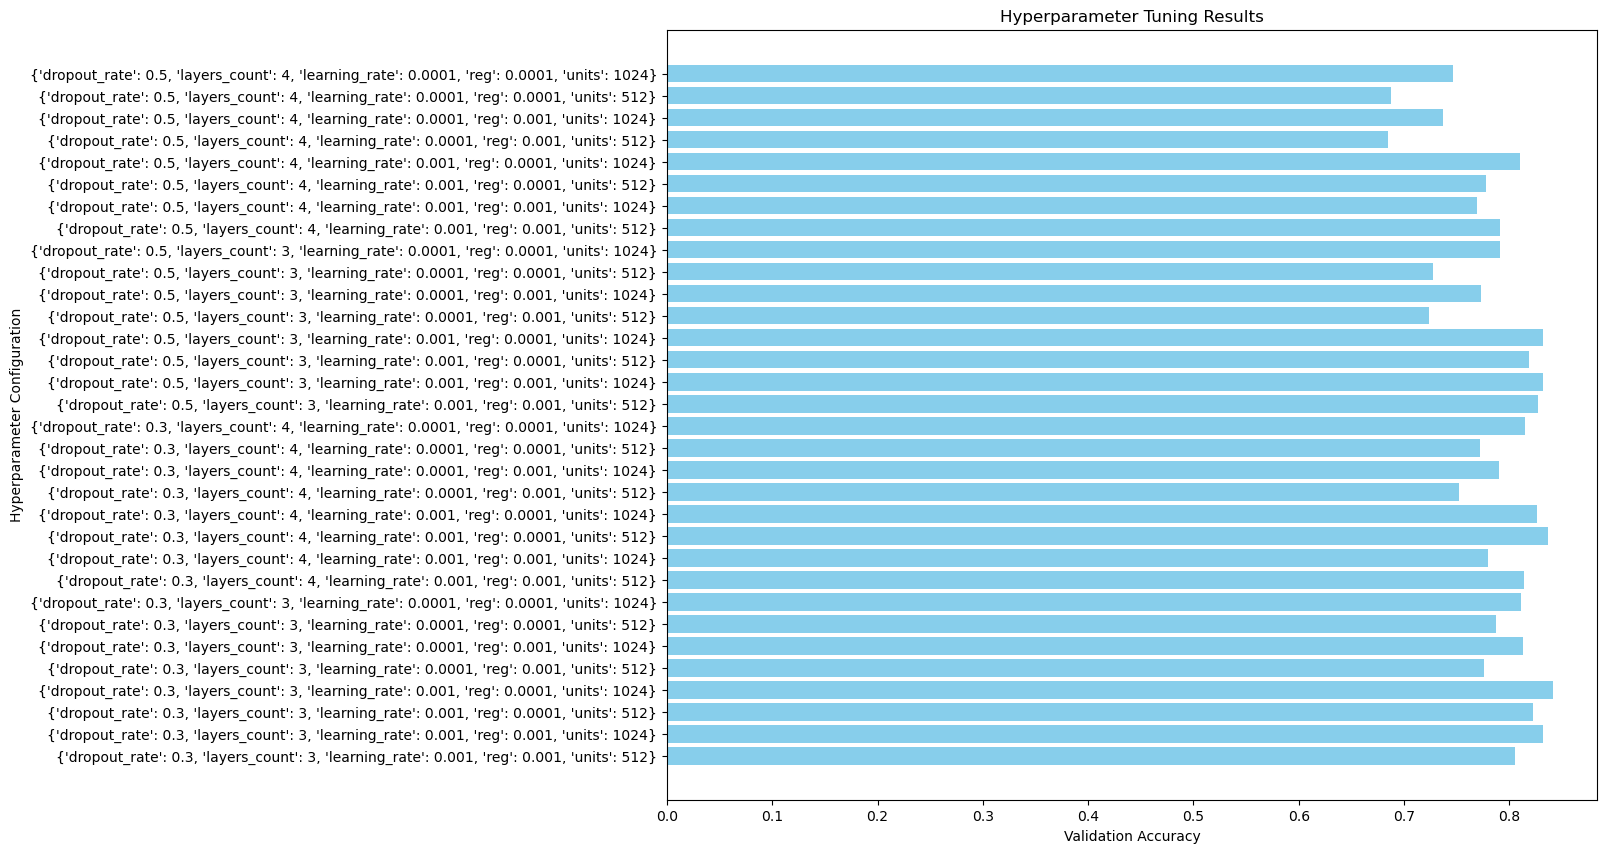

In [493]:
# {Original Code}
# Define hyperparameter search space
param_grid = {
    'units': [512, 1024], 
    'layers_count': [3, 4], 
    'dropout_rate': [0.3, 0.5],
    'learning_rate': [0.001, 0.0001],
    'reg': [0.001, 0.0001],
}

# Run hyperparameter tuning and get the best model
best_model, best_params, best_history = tune_hyperparameters(param_grid, partial_x_train, partial_y_train, x_val, y_val, num_words, num_classes)

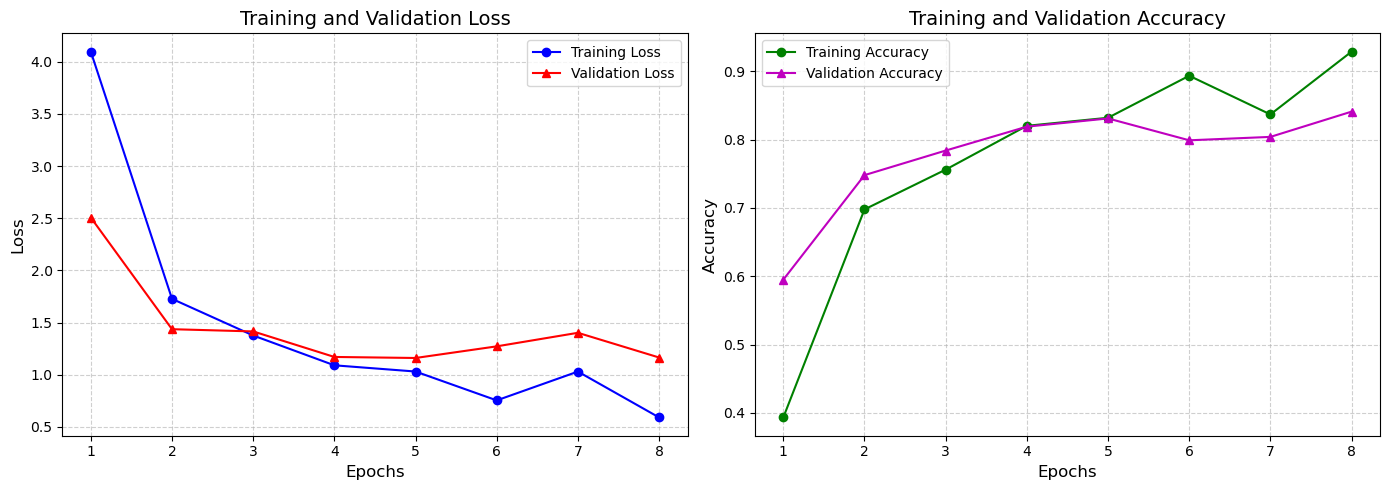

In [494]:
print_history(best_history)

In [501]:
# Evaluate benchmark models and best model
first_model_results = evaluate_model(first_model, "First Model")
scaled_up_model_results = evaluate_model(scaled_up_model, "Scaled Up Model")
best_model_results = evaluate_model(best_model, "Best Model")

32/32 [==============================] - 0s 3ms/step


In [502]:
# Create results table
df_results = pd.DataFrame([random_baseline, majority_baseline, first_model_results, scaled_up_model_results, best_model_results])
print("\nComparison of Model Performance:")
df_results.head(5)


Comparison of Model Performance:


,Model,Accuracy,Precision,Recall,F1-score
0,Random Guessing,0.022,0.021098,0.041739,0.016698
1,Majority Class,0.354,0.008634,0.024390,0.012754
2,First Model,0.816,0.812916,0.536006,0.574730
3,Scaled Up Model,0.761,0.725662,0.494881,0.532115
4,Best Model,0.831,0.874388,0.511930,0.542809


---

## **8. Discussion & Interpretation**

---

## **9. Conclusion & Future Work**

---

## **10. References**